In [1]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as spsig
import scipy.special as spsp

In [2]:
# Some parameters common to all
sps = 4
bt = .5
L = 6
num_taps = L * sps



In [3]:
def analog_equiv(sps, L, bt):
    # Use the erf based formulation
    # This is 1:1 equivalent to the gr-analog implementation
    n = np.arange(L*sps) - L*sps/2
    t = n/sps
    alpha = np.sqrt(2/np.log(2)) * np.pi * bt
    taps = (spsp.erf(alpha * (t + 0.5)) - spsp.erf(alpha * (t - 0.5))) * 0.5 / sps
    return taps/np.sum(taps)

def filter_equiv(sps, bt, num_taps):
    n = np.arange(num_taps) - num_taps/2 + 1
    t = n/sps # equivalent to dt * t0
    s = 1.0/(np.sqrt(np.log(2.0)) / (2*np.pi*bt))
    ts = t * s
    taps = np.exp(-0.5 * ts**2)
    return taps/np.sum(taps)


In [4]:
erf_taps = analog_equiv(sps, L, bt)
exp_taps = filter_equiv(sps, bt, num_taps)


(-50.0, 0.0)

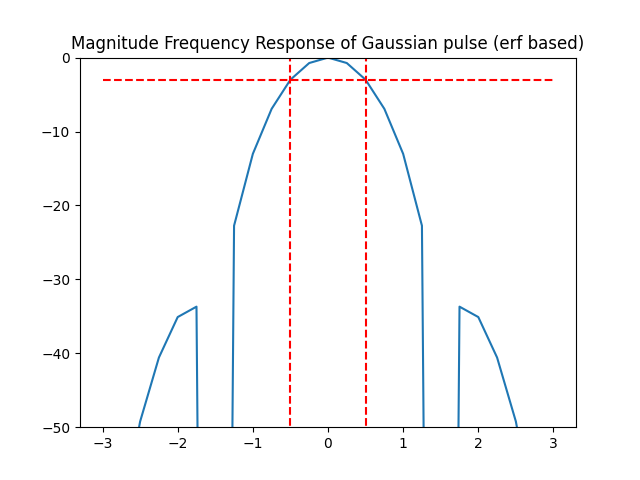

In [5]:
T = np.fft.fftshift(np.fft.fft(erf_taps))
T = 20*np.log10(np.abs(T))
f = np.arange(-L/2, L/2 , 1/sps)

plt.figure()
plt.plot(f, T)
plt.title("Magnitude Frequency Response of Gaussian pulse (erf based)")
plt.vlines([-0.5, 0.5], -60, 0, colors='r', linestyles='dashed')
plt.hlines(-3, -L/2, L/2, colors='r', linestyles='dashed')
plt.ylim(-50,0)


(-50.0, 0.0)

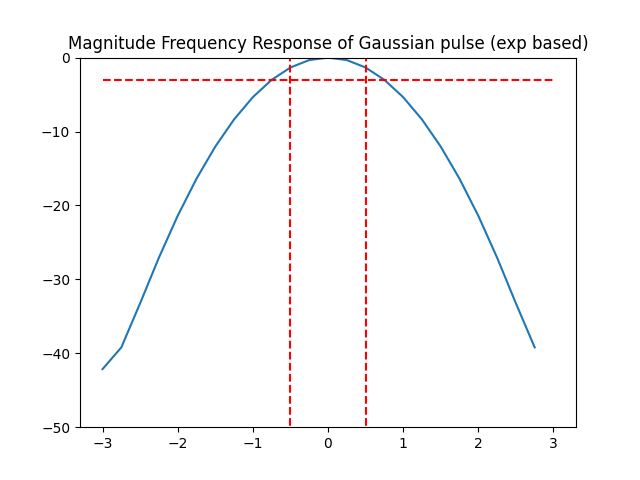

In [6]:
T = np.fft.fftshift(np.fft.fft(exp_taps))
T = 20*np.log10(np.abs(T))
f = np.arange(-L/2, L/2 , 1/sps)

plt.figure()
plt.plot(f, T)
plt.title("Magnitude Frequency Response of Gaussian pulse (exp based)")
plt.vlines([-0.5, 0.5], -60, 0, colors='r', linestyles='dashed')
plt.hlines(-3, -L/2, L/2, colors='r', linestyles='dashed')
plt.ylim(-50,0)